In [43]:
from ast import main
from utils.plotDecBoundaries import plotDecBoundaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#converting the datafile to a numpy array
def data_to_array(df_file):

    df=np.array(df_file,dtype=float)
    num_rows, num_columns=df.shape
    N_f=num_columns-1

    return (df, N_f,num_rows)

#from the dataset obtaining the feature array
def feature_array(df):
    x=df[:,:-1]
    return x

#from the dataset obtaining the label/class array
def label_extraction(df):
    labels=df[:,-1]
    classes, counts=np.unique(labels,return_counts=True)
    N_c=len(classes)

    return (labels, N_c, counts, classes)


#augmenting the feature array for calculations
def augment_matrix(x,num_rows):

    df_x0=np.ones((num_rows,1))
    df_aug=np.hstack((df_x0,x))
    return df_aug


#creating the refelction array based on labels for perceptron learning algorithm
def z_matrix(labels):
    labels_conv= np.where(labels==1,1,-1)
    return labels_conv


#Initializing the weight matrix
def weight_matrix(N_f,a):
    w_m=a*np.ones((1,N_f+1))
    w_m_trans=w_m.transpose()
    return w_m,w_m_trans

#Shuffle function to shuffle the input data before each epoch to implement GD
def shuffle(df_aug,labels_conv,num_rows):
    labels_conv=labels_conv.reshape((num_rows,1))
    df_aug_whole=np.hstack((df_aug,labels_conv))
    np.random.shuffle(df_aug_whole)
    feature_shuffle=df_aug_whole[:,:-1]
    labels_shuffle=df_aug_whole[:,-1]
    return feature_shuffle,labels_shuffle


#Initializing and calculating the criterion function based on the input
def cost_func(df_aug,w_m,labels_conv):
    J=0
    for i in range(len(df_aug)):
        temp=df_aug[i]*labels_conv[i]
        curr_crit=np.dot(w_m,temp)
        J+=np.log(1+np.exp(-curr_crit))
    return J

#Sigmoid function 
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

#Prediction and calculation of the error rate with respect to the true labels
def predict_error(df_aug,labels_conv,w_m_trans):
    error=[]
    y_pred=np.sign(np.dot(df_aug,w_m_trans))
    for i in range(len(y_pred)):
        if y_pred[i]!=labels_conv[i]:
            error.append(1)
    
    cl_error_rate=(len(error)/len(y_pred))*100


    return cl_error_rate


#Training the model using basic sequential gradient descent and logistic regression
def classification(df_aug,labels_conv,w_m,num_rows):
    feature_shuffle,labels_conv_shuffle=shuffle(df_aug,labels_conv,num_rows)
    N_d,N_f=df_aug.shape
    J_arr=[]
    J_arr_epoch=[]
    J_arr=np.array(J_arr)
    J_arr_epoch=np.array(J_arr_epoch)
    error_main=[]
    error_main_epoch=[]
    w_optim=[]
    w_optim=np.array(w_optim)
    flag1 = False
    flag2 = False
    iterations=0
    for epoch in range(100):
        epoch=0
        for i in range(len(feature_shuffle)):
            iterations+=1
            temp=feature_shuffle[i]*labels_conv_shuffle[i]
            curr_crit=np.dot(w_m,temp)
            grad=-(labels_conv_shuffle[i]*feature_shuffle[i])*(sigmoid(-curr_crit))
            w_m=w_m-grad
            w_m_trans_update=w_m.transpose()
            J_val=cost_func(feature_shuffle,w_m,labels_conv_shuffle)
            J_arr=np.append(J_arr,J_val)
            error_rate=predict_error(feature_shuffle,labels_conv_shuffle,w_m_trans_update)
            error_main.append(error_rate)
            w_optim=np.append(w_optim,w_m)
            w_optim=np.array(w_optim)
            w_optim=w_optim.reshape((iterations,N_f))
            #Convergence conditions
            if(error_rate==0):
                print("Data is linearly separable and converges")
                flag1 = True
                break
            if(iterations>=10000):
                flag2 = True
                break
        epoch+=1
        J_arr_epoch=np.append(J_arr_epoch,J_val)
        error_main_epoch.append(error_rate)
        if flag1: 
            w_hat=w_optim[-1,:]
            w_hat_trans=w_hat.transpose()
            break
        if flag2:
            print("Data is not linearly separable and doesn't converge")
            min_crit_pos=np.argmin(J_arr)
            w_hat=w_optim[min_crit_pos]
            w_hat_trans=w_hat.transpose()
            J_val=np.min(J_arr)
            break


    return w_hat,w_hat_trans,error_main,J_arr,J_val,iterations,J_arr_epoch,error_main_epoch    


#Plot function for criterion function and error rate vs iteration if iteration<1000 else vs epoch
def plot_Jvserr(error_main,J_arr,J_arr_epoch,error_main_epoch):
    if len(J_arr) > 1000:
    # plot criterion function and misclassification rate vs. epochs
        plt.plot(J_arr_epoch, label='Criterion Function')
        plt.plot(error_main_epoch, label='Misclassification Rate')
        plt.xlabel('Epoch')
    else:
    # plot criterion function and misclassification rate vs. iterations
        plt.plot(J_arr, label='Criterion Function')
        plt.plot(error_main, label='Misclassification Rate')
        plt.xlabel('Iteration')

    plt.ylabel('Value')
    plt.legend()
    plt.show()


#Plot function tp plot in feature space the training data points, decision boundaries and decision regions
def plot_dec(x,labels_conv,w_m,N_f,num_rows):


        labels_conv=labels_conv.reshape((num_rows,1))
        df=np.hstack((x,labels_conv))


        features = df[:,0:N_f]

        x_min, x_max = np.ceil(max(features[:, 0])) + 1, np.floor(min(features[:, 0])) - 1
        y_min, y_max = np.ceil(max(features[:, 1])) + 1, np.floor(min(features[:, 1])) - 1

        x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        z = w_m[0] + w_m[1] * x + w_m[2] * y

        plt.contour(x, y, z, [0], colors='k')

        plt.scatter(df[df[:, -1] == 1, 0],df[df[:, -1] == 1, 1])
        plt.scatter(df[df[:, -1] == -1, 0],df[df[:, -1] == -1, 1])

        class1 = df[df[:, -1] == 1, 0:1]

        plt.show()


#plot function to produce a histogram of the distance from the decision boundary (g(x)/||weight||).
def plot_hist(feature_array,label_arr,w_vector):


        dis = []
        for i in range(len(feature_array)):
            dis.append(np.matmul(w_vector,feature_array[i])/np.linalg.norm(w_vector))

    
    
        dis1 = []
        label_arr=np.squeeze(label_arr)
        x_class1 = feature_array[label_arr==1]
        for data_point in  x_class1:
            dis1.append(np.matmul(w_vector,data_point)/np.linalg.norm(w_vector))

        dis2 = []
        x_class2 = feature_array[label_arr==-1]
        for data_point in  x_class2:
            dis2.append(np.matmul(w_vector,data_point)/np.linalg.norm(w_vector))

        plt.hist(dis1,rwidth=0.95,color='blue',alpha=0.7,label='class-1')
        plt.hist(dis2,rwidth=0.95,color='red',alpha=0.7,label='class-2')
        plt.hist(dis,rwidth=0.95,color='green',alpha=0.5,label='Datapoints')
        plt.xlabel('Distance from decision boundary')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()


Data is not linearly separable and doesn't converge
No. of iterations it took:  10000
Classification error rate for breast cancer train with optimal w:  1.25 %
The minimal criterion function value is:  26.399179341205535
The optimal weight vector:  [-16.89776132   0.40336461   7.00351468   0.56181337   4.68099972
  -3.15488981  -2.46116373   8.98898999   7.3745803   -0.11967934
  -4.42747797   4.06272692  -0.15628168   1.72945607   9.40142484
  -0.07865868  -5.97799896  -4.54488885  -2.79312548   1.46221974
  -6.09269451   3.72115158  11.0829837    3.61095691  10.85865982
   1.98243936   5.14115471  10.31336164  10.50249969   6.78529074
   0.36178614]


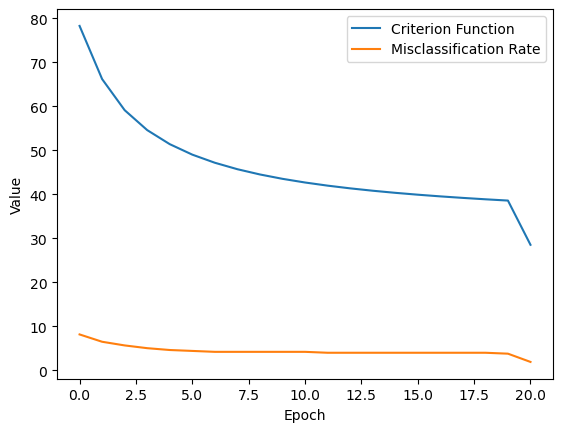

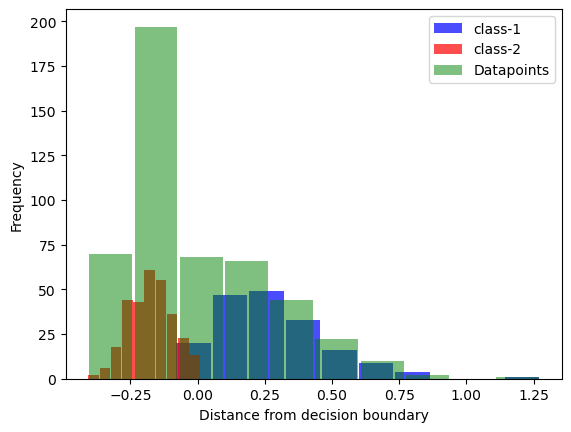

In [52]:
#sequential GD

#loading the training and test dataset
filepath_bctrain="/Users/naveenprabakar/linalg/env/ml_hw1/breast_cancer_train.npy"
filepath_bctest="/Users/naveenprabakar/linalg/env/ml_hw1/breast_cancer_test.npy"
breast_canc_train=np.load(filepath_bctrain)
breast_canc_test=np.load(filepath_bctest)

#Obtaining the feature data and label data from the training data set 
df_bctrain,num_features,num_rows=data_to_array(breast_canc_train)
labels_bct_train=df_bctrain[:,:1]
labels_bct_train=np.array(labels_bct_train)
feature_bct_train=df_bctrain[:,1:num_features+1]
feature_bct_train=np.array(feature_bct_train)

#normalizing the feature data
x_train_L1_norms = np.linalg.norm(feature_bct_train, ord=1, axis=0) 
x_train_normalized = 100 * feature_bct_train / x_train_L1_norms 

#augmenting the normalized feature data
aug_feature_arr_bctrain=augment_matrix(x_train_normalized,num_rows)
#Obtaining the refelected matrix from labels
arr_classes_conv_bctrain=z_matrix(labels_bct_train)

#Initializing the weights
weight_mat_bctrain,weight_mat_trans_bctrain=weight_matrix(num_features,a=0.1)


#Training the data 
class_pred_weight_bctrain,class_pred_weight_trans_bctrain,error_bctrain,cost_arr_bctrain,cost_val_bctrain,iter,cost_val_bctrain_ep,error_bctrain_ep=classification(aug_feature_arr_bctrain,arr_classes_conv_bctrain,weight_mat_bctrain,num_rows)

#Prediction and error rate calculation
error_final_bctrain=predict_error(aug_feature_arr_bctrain,arr_classes_conv_bctrain,class_pred_weight_trans_bctrain)

#Viewing the results
print("No. of iterations it took: ",iter)
print("Classification error rate for breast cancer train with optimal w: ",error_final_bctrain,"%")
print("The minimal criterion function value is: ",cost_val_bctrain)
print("The optimal weight vector: ",class_pred_weight_bctrain)
plot_Jvserr(error_bctrain,cost_arr_bctrain,cost_val_bctrain_ep,error_bctrain_ep)
plot_hist(aug_feature_arr_bctrain,arr_classes_conv_bctrain,class_pred_weight_bctrain)

In [47]:
#Obtaining the prediction results for test data set with the trained weights from sequential GD
df_bctest,num_features,num_rows=data_to_array(breast_canc_test)
labels_bct_test=df_bctest[:,:1]
labels_bct_test=np.array(labels_bct_test)
feature_bct_test=df_bctest[:,1:num_features+1]
feature_bct_test=np.array(feature_bct_test)
x_test_normalized = 100 * feature_bct_test / x_train_L1_norms
aug_feature_arr_bctest=augment_matrix(x_test_normalized,num_rows)
arr_classes_conv_bctest=z_matrix(labels_bct_test)

error_final_bctest=predict_error(aug_feature_arr_bctest,arr_classes_conv_bctest,class_pred_weight_trans_bctrain)

print("Classification error rate for breast cancer test with optimal w: ",error_final_bctest,"%")

Classification error rate for breast cancer test with optimal w:  4.49438202247191 %


In [53]:
#Training the model using stochiastic gradient descent and logistic regression

def classification_stochiastic(df_aug,labels_conv,w_m,num_rows):
    feature_shuffle,labels_conv_shuffle=shuffle(df_aug,labels_conv,num_rows)
    N_d,N_f=df_aug.shape
    J_arr=[]
    J_arr_epoch=[]
    J_arr=np.array(J_arr)
    J_arr_epoch=np.array(J_arr_epoch)
    error_main=[]
    error_main_epoch=[]
    w_optim=[]
    w_optim=np.array(w_optim)
    flag1 = False
    flag2 = False
    iterations=0
    for epoch in range(100):
        epoch=0
        for i in range(len(feature_shuffle)):
            iterations+=1
            temp=feature_shuffle[i]*labels_conv_shuffle[i]
            curr_crit=np.dot(w_m,temp)
            grad=-(labels_conv_shuffle[i]*feature_shuffle[i])*(sigmoid(-curr_crit))
            w_m=w_m-grad
            w_m_trans_update=w_m.transpose()
            J_val=cost_func(feature_shuffle,w_m,labels_conv_shuffle)
            J_arr=np.append(J_arr,J_val)
            error_rate=predict_error(feature_shuffle,labels_conv_shuffle,w_m_trans_update)
            error_main.append(error_rate)
            w_optim=np.append(w_optim,w_m)
            w_optim=np.array(w_optim)
            w_optim=w_optim.reshape((iterations,N_f))
            if(error_rate==0):
                print("Data is linearly separable and converges")
                flag1 = True
                break
            if(iterations>=10000):
                flag2 = True
                break
        epoch+=1
        J_arr_epoch=np.append(J_arr_epoch,J_val)
        error_main_epoch.append(error_rate)
        if flag1: 
            w_hat=w_optim[-1,:]
            w_hat_trans=w_hat.transpose()
            break
        if flag2:
            print("Data is not linearly separable and doesn't converge")
            min_crit_pos=np.argmin(J_arr)
            w_hat=w_optim[min_crit_pos]
            w_hat_trans=w_hat.transpose()
            J_val=np.min(J_arr)
            break
        feature_shuffle,labels_conv_shuffle=shuffle(feature_shuffle,labels_conv_shuffle,num_rows)


    return w_hat,w_hat_trans,error_main,J_arr,J_val,iterations,J_arr_epoch,error_main_epoch      


Data is not linearly separable and doesn't converge
No. of iterations it took:  10000
Classification error rate for breast cancer train with optimal w:  1.875 %
The minimal criterion function value is:  26.384262691837858
The optimal weight vector:  [-16.8018747    0.89633905   8.15636916   1.05947606   5.69140671
  -3.10525509  -2.04424432   8.91300456   7.78703711  -0.68777731
  -4.42444927   3.87838174   0.52874193   1.40039048   9.52449505
  -0.39981168  -6.1451915   -4.75924807  -3.38399047   0.99038796
  -5.51999643   3.86186796  11.27696703   3.72125249  11.09107429
   1.68004429   4.94742004   9.75740414   9.26703177   5.94984949
   0.2940836 ]


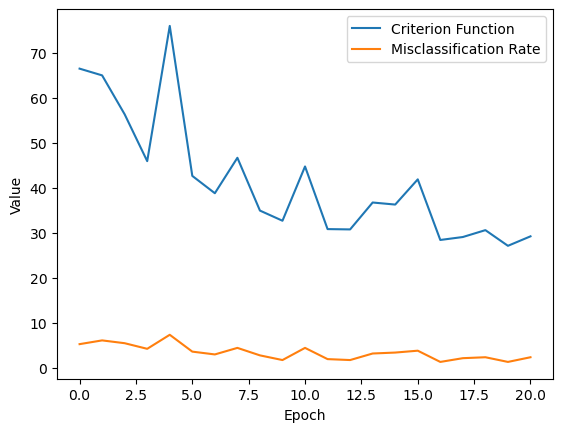

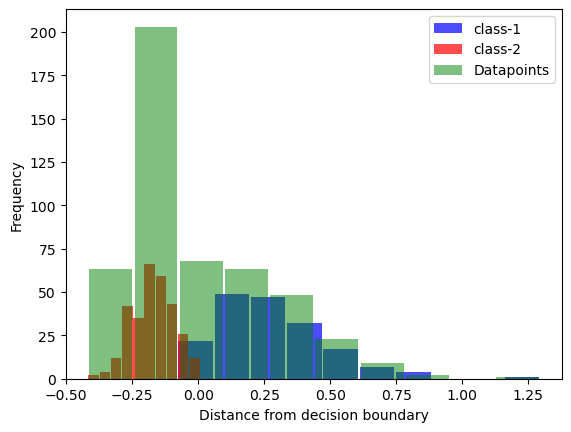

In [54]:
#Training the model using stochiastic GD and viewing the results
class_pred_weight_bctrain_st,class_pred_weight_trans_bctrain_st,error_bctrain_st,cost_arr_bctrain_st,cost_val_bctrain_st,iter_st,cost_val_bctrain_ep_st,error_bctrain_ep_st=classification_stochiastic(aug_feature_arr_bctrain,arr_classes_conv_bctrain,weight_mat_bctrain,num_rows)
error_final_bctrain_st=predict_error(aug_feature_arr_bctrain,arr_classes_conv_bctrain,class_pred_weight_trans_bctrain_st)
print("No. of iterations it took: ",iter_st)
print("Classification error rate for breast cancer train with optimal w: ",error_final_bctrain_st,"%")
print("The minimal criterion function value is: ",cost_val_bctrain_st)
print("The optimal weight vector: ",class_pred_weight_bctrain_st)
plot_Jvserr(error_bctrain_st,cost_arr_bctrain_st,cost_val_bctrain_ep_st,error_bctrain_ep_st)
plot_hist(aug_feature_arr_bctrain,arr_classes_conv_bctrain,class_pred_weight_bctrain_st)

In [55]:
#Obtaining the prediction results for test data set with the trained weights from stochiastic GD
error_final_bctest_st=predict_error(aug_feature_arr_bctest,arr_classes_conv_bctest,class_pred_weight_trans_bctrain_st)

print("Classification error rate for breast cancer test with optimal w: ",error_final_bctest_st,"%")

Classification error rate for breast cancer test with optimal w:  2.247191011235955 %
